## Homework 6: Linear Regression, Features and Regularization 
### Due Date: Tuesday 12/10, 11:59 PM

Following our exploration of housing prices in Boston, Massachusetts, we want to study housing prices in Ames, Iowa. We will use linear regression to predict sale prices from features such as size, number of bathrooms and neighborhood. While we want to add many features into the model, we need to avoid overfitting the training set. So along the way, we will get experience with regularization. We will use Ridge Regression to shrink the weights. Since we need an extra parameter to control the amount of shrinking, we will use validation to guess-and-check different values for the extra parameter. By completing Homework 6, you should get...

- Practice reasoning about features for linear regression particularly polynomial features

- Intuition about regularization particularly Ridge Regression  

- Understanding of feature normalization to prevent against differ scales between features

We will guide you through some exploratory data analysis, laying out an approach to selecting features for the model. After incorporating the features, we will fit a Ridge Regression model to predict housing prices. Finally we will analyze the error of the model. Along the way, we will try to pull together reusable code for each step. Using packages such as pandas and scikit-learn allows us to build a pipeline rather than rewrite different code for different approaches.


We encourage you to think about ways to improve the model's performance with your classmates. If you are interested in try out your ideas, then you could take part in a related [modeling competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### Submission Instructions
You are required to **submit a copy of the notebook to Gradescope**. Follow these steps

1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. 
1. Map your answers to our questions. Otherwise you may lose points. Please see the rubric below.

Consult the [instructional video](https://www.gradescope.com/get_started#student-submission) for more information. Note that 
- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. For each plotting question, please include the code used to generate the plot. If your plot does not appear in the HTML / pdf output, then use `Image('name_of_file')` to embed it.
- You should not display large output cells such as all rows of a table. Instead convert the input cell from Code to Markdown back to Code to remove the output cell.

You are encouraged to **submit the notebook on Jupyter Hub**. Please navigate to the Assignments tab to submit fetch, modify and submit your notebook. Consult the [instructional video](https://nbgrader.readthedocs.io/en/stable/user_guide/highlights.html#student-assignment-list-extension-for-jupyter-notebooks) for more information.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.

**Collaborators:** *list names here*

### Rubric

Question | Points
--- | ---
Gradescope | 2
[Question 1](#q1) | 1
[Question 2](#q2) | 3
[Question 3](#q3) | 3
[Question 4a](#q4) | 3
[Question 4b](#q4) | 2
[Question 5](#q5) | 1
[Question 6](#q6) | 3
[Question 7](#q7) | 2
[Question 8a](#q8a) | 2
[Question 8b](#q8b) | 1
[Question 8c (optional)](#q8c) | 2
Total | 23

Worked with Pooja Patel

### Getting Started

In [ ]:
from IPython.display import Image, Markdown, display

# Import standard packages
import pandas as pd
import numpy as np
import csv
import re

# Set some parameters
np.random.seed(47)
np.set_printoptions(4)
pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15
pd.set_option('precision', 2)

# Import standard plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

from sklearn.linear_model import Ridge

### Fetching the Data

The [Ames dataset](http://jse.amstat.org/v19n3/decock.pdf) consists of 2928 records taken from the Ames, Iowa, Assessor’s Office describing houses sold in Ames from 2006 to 2010.  The data set has 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers) --- 82 features in total.  An explanation of each variable can be found in the included `codebook.txt` file.  The information was used in computing assessed values for individual residential properties sold in Ames, Iowa from 2006 to 2010. 

The data are split into training and test sets with 1998 and 930 observations, respectively.

In [2]:
training_data = pd.read_csv("training.csv")
testing_data = pd.read_csv("testing.csv")

We shold verify that the data shape matches the description.

In [3]:
# TEST 

# 2000 observations and 82 features in training data
assert training_data.shape == (1998, 82)

# 930 observations and 81 features in test data
assert testing_data.shape == (930, 82)

# training and testing should have the same columns
assert len(np.intersect1d(testing_data.columns.values, 
                          training_data.columns.values)) == 82

 The Ames data set contains information that typical homebuyers would want to know.  A more detailed description of each variable is included in `codebook.txt`. You should take some time to familiarize yourself with the codebook before moving forward.

In [4]:
# RUN

training_data.columns.values

array(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage',
       'Lot_Area', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour',
       'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood',
       'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style',
       'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Year_Remod/Add',
       'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd',
       'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond',
       'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical', '1st_Flr_SF', '2nd_Flr_SF',
       'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',

### Exploratory Data Analysis

We will generate a couple visualizations to understand the relationship between `SalePrice` and other features. Note that we will examine the training data so that information from the testing data does not influence our modeling decisions. Looking at the testing data introduces [bias](https://en.wikipedia.org/wiki/Data_dredging) into the model.

#### Question 1  <a name="q1"></a>
We begin by examining a [raincloud plot](https://micahallen.org/2018/03/15/introducing-raincloud-plots/amp/?__twitter_impression=true) (a combination a histogram with density, a strip plot, and a box plot) of our target variable `SalePrice`.  At the same time, we also take a look at some descriptive statistics of this variable.

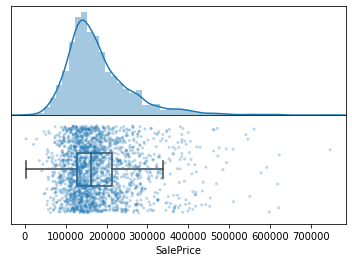

In [5]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    training_data['SalePrice'], 
    ax=axs[0]
)
sns.stripplot(
    training_data['SalePrice'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    training_data['SalePrice'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(training_data['SalePrice']) * 0.05
xmin = np.min(training_data['SalePrice']) - spacer
xmax = np.max(training_data['SalePrice']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

In [6]:
training_data['SalePrice'].describe()

count      1998.00
mean     180785.11
std       81619.69
min        2489.00
25%      128600.00
50%      162000.00
75%      213175.00
max      747800.00
Name: SalePrice, dtype: float64

To check your understanding of the graph and summary statistics above, answer the following `True` or `False` questions:

1. The distribution of `SalePrice` in the training set is left-skew.
1. The mean of `SalePrice` in the training set is greater than the median.
1. At least 25% of the houses in the training set sold for more than \$200,000.00.

In [7]:
# YOUR CODE HERE
q1statement1 = False
q1statement2 = True
q1statement3 = True
#raise NotImplementedError()

In [8]:
# TEST
set([q1statement1, q1statement2, q1statement3]).issubset({False, True})

True

#### Question 2 <a name="q2"></a>

We know that Total Bathrooms can be calculated as:

$$ \text{TotalBathrooms}=(\text{BsmtFullBath} + \text{FullBath}) + \dfrac{1}{2}(\text{BsmtHalfBath} + \text{HalfBath})$$

Write a function `add_total_bathrooms(data)` that returns a copy of `data` with an additional column called `TotalBathrooms` computed by the formula above.  Treat missing values as zeros.  Remember that you can make use of vectorized code here; you shouldn't need any `for` statements. 

In [9]:
def add_total_bathrooms(data):
    """
    Input:
      data (data frame): a data frame containing at least 4 numeric columns 
            Bsmt_Full_Bath, Full_Bath, Bsmt_Half_Bath, and Half_Bath
    """
    with_bathrooms = data.copy()
    bath_vars = ['Bsmt_Full_Bath', 'Full_Bath', 'Bsmt_Half_Bath', 'Half_Bath']
    weights = pd.Series([1, 1, 0.5, 0.5], index=bath_vars)
    # YOUR CODE HERE
    with_bathrooms['TotalBathrooms'] = with_bathrooms[bath_vars].dot(weights)
    #raise NotImplementedError()
    return with_bathrooms

training_data = add_total_bathrooms(training_data)

In [10]:
# TEST
assert not training_data['TotalBathrooms'].isnull().any() # Check that missing values are dealt with
assert training_data['TotalBathrooms'].sum() == 4421.5 # Check that the values are as expected

Using a boxplot, shows that `TotalBathrooms` is associated with `SalePrice`. Save your vizualization as `boxplot.png`

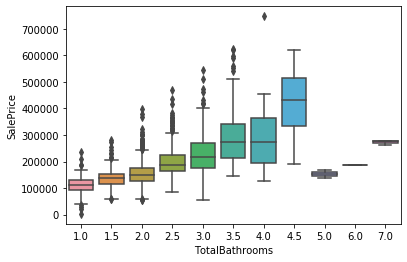

In [11]:
# YOUR CODE HERE
sns.boxplot(x='TotalBathrooms', y='SalePrice', data=training_data)
#raise NotImplementedError()
plt.savefig('boxplot.png')

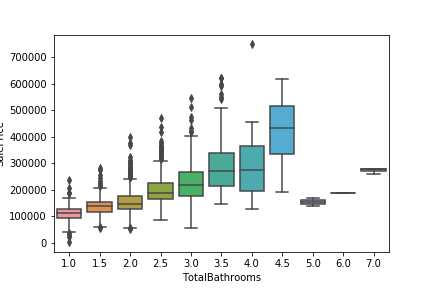

In [12]:
# RUN

Image('boxplot.png')

### Encoding Features

We will create new features out of old features through some data transformations.


#### Question 3 <a name="q3"></a>

We can visualize the association between `SalePrice` and `Gr_Liv_Area`.  The `codebook.txt` file tells us that `Gr_Liv_Area` measures "above grade (ground) living area square feet." This variable represents the square footage of the house excluding anything underground.  

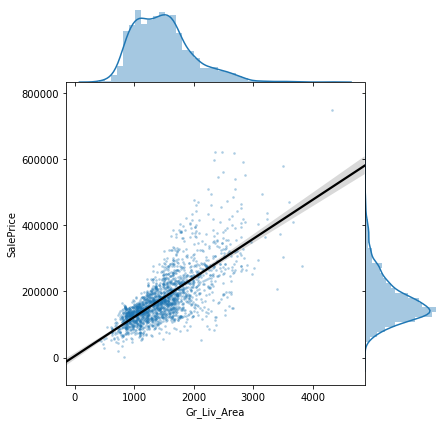

In [13]:
sns.jointplot(
    x='Gr_Liv_Area', 
    y='SalePrice', 
    data=training_data,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
);

Since `Gr_Liv_Area` excludes the garage space, we visualize the association between `SalePrice` and `Garage_Area`.  The `codebook.txt` file tells us that `Gr_Liv_Area` measures "Size of garage in square feet." 

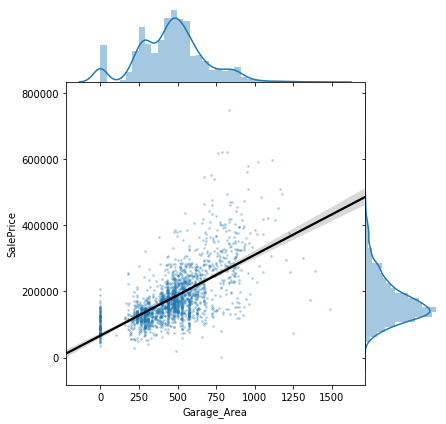

In [14]:
sns.jointplot(
    x='Garage_Area', 
    y='SalePrice', 
    data=training_data,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
);

Write a function called `add_power` that inputs
 - a table `data`
 - a column name `column_name` of the table 
 - positive integer `degree`

and outputs 

 - a copy of `data` with an additional column called `column_name2` containing all entries of `column_name` raised to power `degree`.  

In [15]:
def add_power(data, column_name, degree):
    """
    Input:
      data (data frame): a data frame containing column called column_name
      column_name (string): a column in data
      degree: positive integer 

    Output: 
      copy of data containing a column called column_name2 with entries of column_name to power degree
    """
    with_power = data.copy()
    # YOUR CODE HERE
    with_power["%s2" % column_name] = with_power[column_name]**degree
    #raise NotImplementedError()
    return with_power

training_data = add_power(training_data, "Garage_Area", 2)
training_data = add_power(training_data, "Gr_Liv_Area", 2)

Among `Gr_Liv_Area`, `Gr_Liv_Area2`, `Garage_Area`, `Garage_Area2` which has the largest correlation with `SalePrice`? Note that pd.DataFrame.corr would be helpful.

In [16]:
print(training_data.corr().unstack().sort_values().drop_duplicates())
highest_variable = 'Gr_Liv_Area'

# YOUR CODE HERE
#raise NotImplementedError()

Order          Yr_Sold          -0.98
Bsmt_Unf_SF    BsmtFin_SF_1     -0.49
Lot_Frontage   MS_SubClass      -0.44
Bsmt_Unf_SF    Bsmt_Full_Bath   -0.38
Year_Built     Enclosed_Porch   -0.37
PID            Year_Built       -0.35
Overall_Cond   Year_Built       -0.35
               Garage_Yr_Blt    -0.31
Garage_Yr_Blt  Enclosed_Porch   -0.29
PID            Garage_Yr_Blt    -0.27
                                 ... 
Gr_Liv_Area2   TotRms_AbvGrd     0.78
Garage_Cars    Garage_Area2      0.78
1st_Flr_SF     Total_Bsmt_SF     0.78
Overall_Qual   SalePrice         0.79
Gr_Liv_Area    TotRms_AbvGrd     0.81
Garage_Yr_Blt  Year_Built        0.84
Garage_Cars    Garage_Area       0.89
Garage_Area2   Garage_Area       0.94
Gr_Liv_Area2   Gr_Liv_Area       0.97
Order          Order             1.00
Length: 862, dtype: float64


In [17]:
# TEST
assert highest_variable in ['Gr_Liv_Area', 'Gr_Liv_Area2', 'Garage_Area', 'Garage_Area2']

#### Question 4 <a name="q4"></a>




Let's take a look at the relationship between neighborhood and sale prices of the houses in our data set.

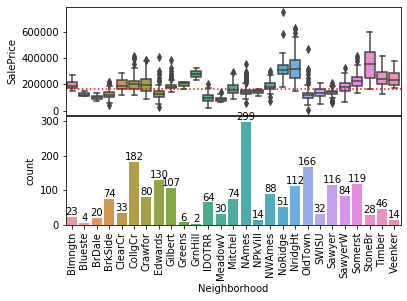

In [18]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x='Neighborhood',
    y='SalePrice',
    data=training_data.sort_values('Neighborhood'),
    ax=axs[0]
)

sns.countplot(
    x='Neighborhood',
    data=training_data.sort_values('Neighborhood'),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y=training_data['SalePrice'].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.01)

We find a lot of variation in prices across neighborhoods. Moreover, the amount of data available is not uniformly distributed among neighborhoods.  North Ames, for example, comprises almost 15% of the training data while Green Hill has only 2 observations in this data set.

One way we can deal with the lack of data from some neighborhoods is to create a new feature that bins neighborhoods together.  Let's categorize our neighborhoods in a crude way: we'll take the top 3 neighborhoods measured by median `SalePrice` and identify them as "rich neighborhoods"; the other neighborhoods are not marked.

#### Question 4a <a name="q4b"></a> 
Write a function that returns a list of the top `n` neighborhoods as measured by our choice of aggregating function.  For example, in the setup above, we would want to call `find_rich_neighborhoods(training_data, 3, np.median)` to find the top 3 neighborhoods measured by median `SalePrice`.

**Hint** Try using the operations `groupby`, `apply` and `sort_values`.

In [19]:
def find_rich_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (data frame): should contain at least a string-valued Neighborhood
        and a numeric SalePrice column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the top n richest neighborhoods as measured by the metric function
    """
    neighborhoods = ...
    # YOUR CODE HERE
    neighborhoods = list(data.groupby('Neighborhood')['SalePrice']
                    .aggregate(metric)
                    .sort_values(ascending=False)
                    .head(n)
                    .index.values )
    #raise NotImplementedError()
    return neighborhoods

rich_neighborhoods = find_rich_neighborhoods(training_data, 3, np.median)
rich_neighborhoods

['StoneBr', 'NridgHt', 'NoRidge']

In [20]:
# TEST
assert len(find_rich_neighborhoods(training_data, 5, np.median))
assert isinstance(rich_neighborhoods, list)
assert all([isinstance(neighborhood, str) for neighborhood in rich_neighborhoods])

#### Question 4b <a name="q4b"></a> 

We now have a list of neighborhoods we've deemed as richer than others.  Let's use that information to make a new variable `in_rich_neighborhood`.  Write a function `add_rich_neighborhood` that adds an indicator variable which takes on the value 1 if the house is part of `rich_neighborhoods` and the value 0 otherwise.

Note that [`pd.Series.astype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.astype.html) may be useful for converting True/False values to integers.


In [21]:
def add_in_rich_neighborhood(data, neighborhoods):
    """
    Input:
      data (data frame): a data frame containing a 'Neighborhood' column with values
        found in the codebook
      neighborhoods (list of strings): strings should be the names of neighborhoods
    Output:
      data frame identical to the input with the addition of a binary
      in_rich_neighborhood column
    """
     # YOUR CODE HERE
    data['in_rich_neighborhood'] = (data['Neighborhood']
                                    .isin(neighborhoods)
                                    .astype('int32'))
    #raise NotImplementedError()
    return data

rich_neighborhoods = find_rich_neighborhoods(training_data, 3, np.median)
training_data = add_in_rich_neighborhood(training_data, rich_neighborhoods)

In [22]:
# TEST
assert sum(training_data.loc[:, 'in_rich_neighborhood']) == 191
assert sum(training_data.loc[:, 'in_rich_neighborhood'].isnull()) == 0

### Modeling

We can use the features from Question 2, Question 3, and Question 4 to determine a model. 

#### Question 5 <a name="q5"></a> 

Remember that we need to normalize features for regularization. If the features have different scales, then regularization will unduly shrink the weights for features with smaller scales.

Write a function called `standardize` that inputs either a 1 dimensional array or a 2 dimensional array `Z` of numbers and outputs a copy of `Z` where the columns have been transformed to have mean 0 and standard deviation 1. 

To avoid dividing by a small number, you should add 0.00001 to the standard deviation in the denominator.  


In [23]:
def standardize(Z):
    """
    Input:
       Z: 1 dimensional or 2 dimensional array 
    Outuput
       copy of Z with columns having mean 0 and variance 1
    """
    # YOUR CODE HERE
    s = Z - Z.mean(axis = 0)
    standardized = s / np.std(s, axis = 0)
    return standardized
    #raise NotImplementedError()

In [24]:
# TEST 

Z = training_data[['Garage_Area','Gr_Liv_Area']].values

assert np.all(np.isclose(standardize(Z).sum(axis = 0), [0,0]))

#### Question 6 <a name="q6"></a>

Let's split the training set into a training set and a validation set. We will use the training set to fit our model's parameters. We will use the validation set to estimate how well our model will perform on unseen data. If we used all the data to fit our model, we would not have a way to estimate model performance on unseen data.

In [25]:
# RUN 

training_data_copy = pd.read_csv('training.csv')

Split the data in `training_data_copy` into two DataFrames named `training_data` and `validating_data`. Let `training_data` contain 80% of the data, and let `validating_data` contain the remaining 20% of the data. 

To do this, first create two NumPy arrays named `train_indices` and `validate_indices`. `train_indices` should contain a *random* 80% of the indices, and `validate_indices` should contain the remaining 20% of the indices. Then, use these arrays as indices to break `training_data_copy` into two pieces.


In [26]:
# This makes the train-test split in this section reproducible across different runs 
# of the notebook. You do not need this line to run train_test_split in general
np.random.seed(47)

training_data_len = len(training_data_copy)
indices = np.arange(training_data_len)
shuffled_indices = np.random.permutation(indices)

In [27]:
# Set train_indices to the first 80% of shuffled_indices and validate_indices to the rest.

# YOUR CODE HERE
train_indices = shuffled_indices[:int(training_data_len * 0.8)]
validate_indices = shuffled_indices[int(training_data_len * 0.8):]
#raise NotImplementedError()

In [28]:
# Create training_data and validating_data by indexing training_data_copy with 
# `train_indices` and `validate_indices`

# YOUR CODE HERE
training_data = training_data_copy.iloc[train_indices]
validating_data = training_data_copy.iloc[validate_indices]
#raise NotImplementedError()

In [29]:
# TEST
assert training_data.shape == (1598, 82) # train should contain 80% of the data
assert validating_data.shape == (400, 82) # test should contain 20% of the data

In [30]:
# TEST
assert np.intersect1d(train_indices, validate_indices).size == 0 # make sure train_indices and test_indices have no overlap
assert np.intersect1d(training_data['PID'], validating_data['PID']).size == 0 # make sure train and test have no overlapping houses

### Reusable Pipeline

We want to try a couple different models. For each model, we will have to apply transformations to the data. By bundling the transformations together, we can apply can efficiently pass data to the different models. 

We use a single function called `process_data`. We select a handful of features to use from the many that are available.

In [31]:
# RUN

def select_columns(data, columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data(data):
    """Process the data for a guided model."""
    
    # Transform Data, Select Features
    nghds = find_rich_neighborhoods(data, 3, metric=np.median)
    
    data = ( data.pipe(add_total_bathrooms)
                 .pipe(add_power,'Gr_Liv_Area', 2)
                 .pipe(add_power,'Garage_Area', 2)
                 .pipe(add_in_rich_neighborhood, nghds)
                 .pipe(select_columns, ['SalePrice', 
                                          'Gr_Liv_Area', 
                                          'Garage_Area',
                                          'Gr_Liv_Area2', 
                                          'Garage_Area2',
                                          'TotalBathrooms',
                                          'in_rich_neighborhood']) )
    
    # Return predictors and response variables separately
    data.dropna(inplace = True)
    X = data.drop(['SalePrice'], axis = 1)
    X = standardize(X)
    y = data.loc[:, 'SalePrice']
    y = standardize(y)
    
    return X, y

Note that we split our data into `X`, a matrix of features, and `y`, a vector of sale prices. 

Run the cell below to feed our training, validating and testing data through the pipeline, generating `X_train`, `y_train`, `X_test`, and `y_test`.

In [32]:
# RUN
# Pre-process our training and test data in exactly the same way

X_train, y_train = process_data(training_data)
X_validate, y_validate = process_data(validating_data)
X_test, y_test = process_data(testing_data)

### Fitting the Model

We are ready to fit a model.  The model we will fit can be written as follows:

$$\begin{align*}
\text{SalePrice} = \theta_0 + \theta_1 \cdot \text{Gr_Liv_Area} + \theta_2 \cdot \text{Gr_Liv_Area2} \\ + \theta_3 \cdot \text{Garage_Area} + \theta_4 \cdot \text{Garage_Area2} \\ + \theta_5 \cdot \text{is_in_rich_neighborhood} \\ + \theta_6 \cdot \text{TotalBathrooms}
\end{align*}
$$

Here `Gr_Liv_Area`, `Gr_Liv_Area2`, `Garage_Area`, and `Garage_Area2` are continuous variables and `is_in_rich_neighborhood` and `TotalBathrooms` are discrete variables. While  `is_in_rich_neighborhood` is a one-hot encoding of categories, `TotalBathrooms` can be understsood as a number.

#### Question 7 <a name="q7"></a>

We will use a [`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) to implement Ridge Regression. We must specify three inputs. 

 - `normalize`: Having applied the function `standardize` to the data, we should set `normalize` to False
 - `fit_intercept`: Having applied the function `standardize` to the data, we should set `fit_intercept` to False. The intercept of our model corresponds to $\theta_0$. Since the mean of the columns is 0, we know that $\widehat{\theta_0} = 0$
 - `alpha`: We need an extra parameter to specify the emphasis on regularization. Large values of `alpha` mean greater emphasis on regularization. We will try a range of values.
 
For each value of alpha, generate a `Ridge` model. Store in the dictionary `models`.  



In [33]:
models = dict()
alphas = np.logspace(-4,4,10)

for alpha in alphas:
    # YOUR CODE HERE
    ridge_regression_model = Ridge(alpha=alpha, fit_intercept=False, normalize=False)
    #raise NotImplementedError()
    models[alpha] = ridge_regression_model

For each `alpha`, fit the corresponding model in `models` with `X_train`, `y_train`.

In [34]:

for alpha, model in models.items():
    # YOUR CODE HERE
    #print(model)
    model.fit(X_train, y_train)
    #raise NotImplementedError()

Plot the weights for each value of `alpha`.

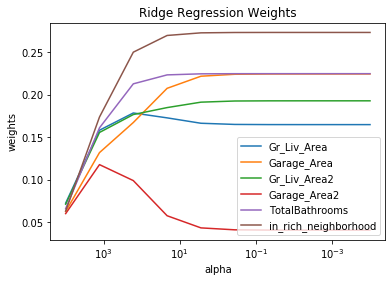

In [35]:
# RUN

labels =   ['Gr_Liv_Area', 
            'Garage_Area',
            'Gr_Liv_Area2', 
            'Garage_Area2',
            'TotalBathrooms',
            'in_rich_neighborhood']

coefs = []
for alpha, model in models.items():
    coefs.append(model.coef_)

coefs = zip(*coefs)

fig, ax = plt.subplots(ncols=1, nrows=1)

for coef, label in zip(coefs, labels):
    plt.plot(alphas, coef, label = label)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Regression Weights')
plt.legend()
plt.savefig('reg_path.png')

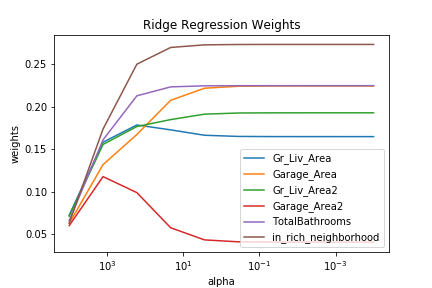

In [36]:
# RUN

Image('reg_path.png')

### Evaluating the Model

Is our linear model any good at predicting house prices? Let's measure the quality of our model by calculating the Root-Mean-Square Error (RMSE) between our predicted house prices and the true prices stored in `SalePrice`.

$$\text{RMSE} = \sqrt{\dfrac{\sum_{\text{houses in test set}}(\text{actual price of house} - \text{predicted price of house})^2}{\text{# of houses in data set}}}$$

Here we have a function called `rmse` that calculates the RMSE of a model.

In [37]:
# RUN

def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2)) # SOLUTION

#### Question 8a <a name="q8a"></a>

For each `alpha`, use `rmse` to calculate the training error and validating error. 

In [38]:
rmse_training = dict()
rmse_validating = dict()

for alpha, model in models.items():
    # YOUR CODE HERE
    rmse_training[model.alpha] = rmse(y_train,model.predict(X_train))
    rmse_validating[model.alpha] = rmse(y_validate,model.predict(X_validate))
    #raise NotImplementedError()
    
rmse_training = sorted(rmse_training.items(), key = lambda k: k[1])    
rmse_validating = sorted(rmse_validating.items(), key = lambda k: k[1])   

Which value of `alpha` has the smalled RMSE on the training set?

In [39]:
alpha_training_min = rmse_training[0][0]

# YOUR CODE HERE
#raise NotImplementedError()

In [40]:
# TEST 
assert alpha_training_min in alphas

Which value of `alpha` has the smallest RMSE on the validating set?

In [41]:
alpha_validating_min = rmse_validating[0][0]

# YOUR CODE HERE
#raise NotImplementedError()

In [42]:
# TEST 
assert alpha_validating_min in alphas

#### Question 8b <a name="q8b"></a>

Using the `alpha` from Question 8a with the smallest RMSE on the validating set, predict `SalePrice` on the testing set. 

In [43]:
y_predict = models[alpha_validating_min].predict(X_test)

# YOUR CODE HERE
#raise NotImplementedError()

One way of understanding the appropriateness of a model is through a residual plot. Run the cell below to plot the actual sale prices against the residuals of the model for the test data.

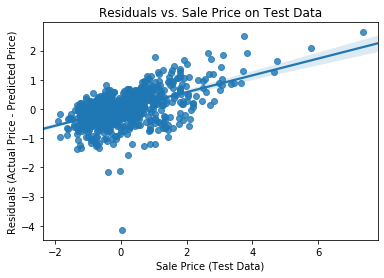

In [44]:
# RUN

residuals = y_test - y_predict
ax = sns.regplot(y_test, residuals)
ax.set_xlabel('Sale Price (Test Data)')
ax.set_ylabel('Residuals (Actual Price - Predicted Price)')
ax.set_title("Residuals vs. Sale Price on Test Data")
plt.savefig('residuals.png')


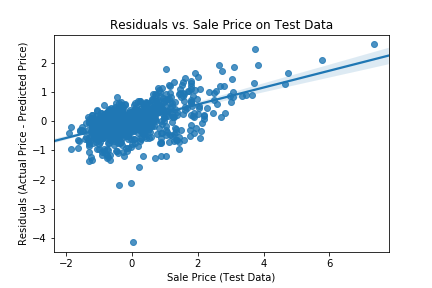

In [45]:
# RUN

Image('residuals.png')

#### Question 8c (Optional) <a name="q8c"></a>


Ideally, we would see a horizontal line of points at 0. The next best thing would be a set of points centered at 0. However the most expensive homes are always more expensive than our prediction. 

What changes could you make to your linear model to improve its accuracy and lower the test error? Suggest at least two things you could try in the cell below, and carefully explain how each change could potentially improve your model's accuracy.

Your response here...

One thing that you could do is remove the outliers from the data at a certain threshold, such that after a certain SalePrice for a home, we are not taking in account that data because we are aware that it will always be more expensive than our prediction  
Another thing that can be done to improve the accuracy is to determine what other factors that we arent taking into account that may be affecting the price of a home, such as neighborhood, or size, and make sure that that information is also being taken into account for our model.